# Tidy data

Open RStudio.

Open a new R script in R and **save it as** `wpa_6_LastFirst.R` (where Last and First is your last and first name). 

Careful about: capitalizing, last and first name order, and using `_` instead of `-`.

At the top of your script, write the following (**with appropriate changes**):

In [1]:
# Assignment: WPA 6
# Name: Laura Fontanesi
# Date: 13 April 2021

## 1. Definition of tidy data

In tidy data:
- Each variable forms a **column**.
- Each observation forms a **row**.

This means that data in [wide format](https://en.wikipedia.org/wiki/Wide_and_narrow_data) are *not* tidy.

Funtions to transform dataset:

- `pivot_longer()`(https://tidyr.tidyverse.org/reference/pivot_longer.html), newer version of `gather()`

- `pivot_wider()`(https://tidyr.tidyverse.org/reference/pivot_wider.html), newer version of `spread()`

The pivot functions are to be preferred, because they are still under development. But gather and spread are also good.

## 2. Some examples

We can install the [fivethirtyeight](https://fivethirtyeight-r.netlify.com/articles/fivethirtyeight.html) which contains many datasets to practice data-tidying.

In [1]:
install.packages('fivethirtyeight')


The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpFzFxkp/downloaded_packages


In [2]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=8, repr.plot.height=5)

In [3]:
library(tidyverse)
library(fivethirtyeight)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')



### pulitzer dataset

In [4]:
head(pulitzer)

dim(pulitzer)

newspaper,circ2004,circ2013,pctchg_circ,num_finals1990_2003,num_finals2004_2014,num_finals1990_2014
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
USA Today,2192098,1674306,-24,1,1,2
Wall Street Journal,2101017,2378827,13,30,20,50
New York Times,1119027,1865318,67,55,62,117
Los Angeles Times,983727,653868,-34,44,41,85
Washington Post,760034,474767,-38,52,48,100
New York Daily News,712671,516165,-28,4,2,6


[1] 50  7

Here is the article connected to this dataset: https://fivethirtyeight.com/features/do-pulitzers-help-newspapers-keep-readers/

This format might be good if you are interested in analysing the `pctchg_circ` variable, which summarizes the percentage change in daily circulation numbers from the year 2004 to the year 2013.

But what if you want to look at the daily circulations? These are two observations done in two different years. Therefore, the data in this format are not tidy.

To make it more tidy, we should pivot the dataset to a longer format:

In [5]:
pulitzer_new = pulitzer %>%
    pivot_longer(cols = starts_with("circ"), # circ2004:circ2013
                 names_to = "year_circulation",
                 names_prefix = "circ", # not necessary but better do
                 values_to = "daily_circulations") %>%
    arrange(year_circulation) # not necessary

dim(pulitzer_new)
head(pulitzer_new)

[1] 100   7

newspaper,pctchg_circ,num_finals1990_2003,num_finals2004_2014,num_finals1990_2014,year_circulation,daily_circulations
<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>
USA Today,-24,1,1,2,2004,2192098
Wall Street Journal,13,30,20,50,2004,2101017
New York Times,67,55,62,117,2004,1119027
Los Angeles Times,-34,44,41,85,2004,983727
Washington Post,-38,52,48,100,2004,760034
New York Daily News,-28,4,2,6,2004,712671


Now we can plot the daily circulation numbers, divided by year, across the different newspapers.

Note below how:

- I used `reorder` to order the newspapers based on the total number of daily circulations

- I used `geom_col` instead of `geom_bar` because we already have the total number, and no mean/counting has to be computed per category (per newspaper)

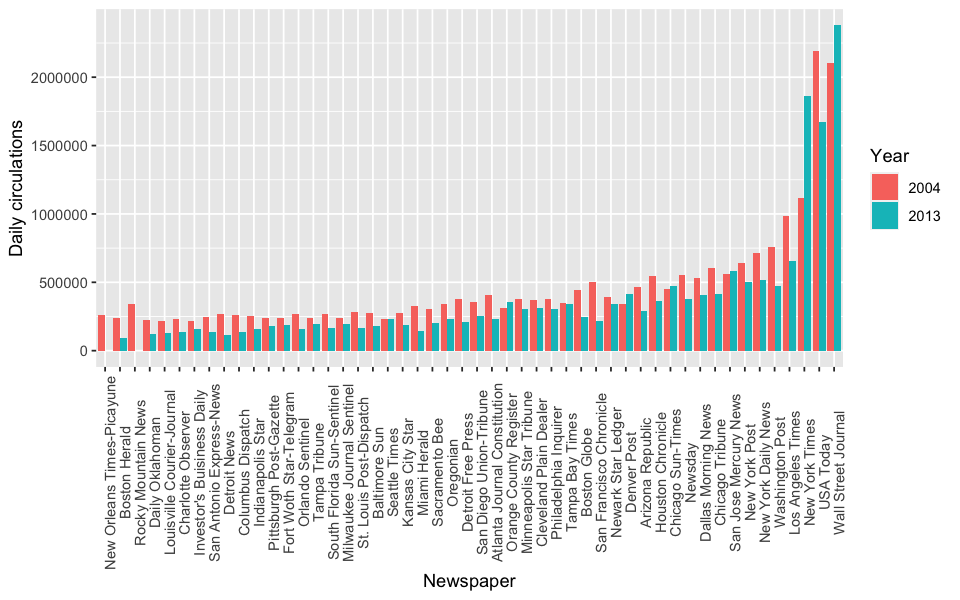

In [6]:
ggplot(data = pulitzer_new, mapping = aes(x = reorder(newspaper, daily_circulations), y = daily_circulations, fill = factor(year_circulation))) +
    geom_col(position='dodge') +
    labs(x = 'Newspaper', y = 'Daily circulations', fill='Year') + 
    theme(axis.text.x = element_text(angle = 90))

#### drug_use dataset

In [7]:
drug_use

age,n,alcohol_use,alcohol_freq,marijuana_use,marijuana_freq,cocaine_use,cocaine_freq,crack_use,crack_freq,⋯,oxycontin_use,oxycontin_freq,tranquilizer_use,tranquilizer_freq,stimulant_use,stimulant_freq,meth_use,meth_freq,sedative_use,sedative_freq
<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,2798,3.9,3,1.1,4,0.1,5.0,0.0,NA,⋯,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NA,0.2,13.0
13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0,⋯,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5,8.7,24,0.1,5.5,0.0,NA,⋯,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5,⋯,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0,⋯,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0,⋯,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24,33.7,52,3.2,5.0,0.4,10.0,⋯,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36,33.4,60,4.1,5.5,0.5,2.0,⋯,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48,34.0,60,4.9,8.0,0.6,5.0,⋯,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [8]:
glimpse(drug_use)

Rows: 17
Columns: 28
$ age                <ord> 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22-23, 24-2…
$ n                  <int> 2798, 2757, 2792, 2956, 3058, 3038, 2469, 2223, 227…
$ alcohol_use        <dbl> 3.9, 8.5, 18.1, 29.2, 40.1, 49.3, 58.7, 64.6, 69.7,…
$ alcohol_freq       <dbl> 3, 6, 5, 6, 10, 13, 24, 36, 48, 52, 52, 52, 52, 52,…
$ marijuana_use      <dbl> 1.1, 3.4, 8.7, 14.5, 22.5, 28.0, 33.7, 33.4, 34.0, …
$ marijuana_freq     <dbl> 4, 15, 24, 25, 30, 36, 52, 60, 60, 52, 52, 60, 52, …
$ cocaine_use        <dbl> 0.1, 0.1, 0.1, 0.5, 1.0, 2.0, 3.2, 4.1, 4.9, 4.8, 4…
$ cocaine_freq       <dbl> 5.0, 1.0, 5.5, 4.0, 7.0, 5.0, 5.0, 5.5, 8.0, 5.0, 5…
$ crack_use          <dbl> 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.4, 0.5, 0.6, 0.5, 0…
$ crack_freq         <dbl> NA, 3.0, NA, 9.5, 1.0, 21.0, 10.0, 2.0, 5.0, 17.0, …
$ heroin_use         <dbl> 0.1, 0.0, 0.1, 0.2, 0.1, 0.1, 0.4, 0.5, 0.9, 0.6, 1…
$ heroin_freq        <dbl> 35.5, NA, 2.0, 1.0, 66.5, 64.0, 46.0, 180.0, 45.0, …
$ hallucinogen_use 

In [9]:
dim(drug_use)

[1] 17 28

The data were given to us again in a **wide format**, as many observations are stored in separate columns: `alchohol_use` and `heroin_use`, for example, are two observations of "drug use" for each of the age categories, so it would make sense to have them in separate rows.

Because in each column two information are stored, namely the name of the drug and the type of measure (whether it is use of frequency), we need to specify which character divides this information, and give two separate names of columns where we want this information to end up in:

In [10]:
# First we need to fix the "pain_releiver_use" and "_freq" columns:
drug_use_new = rename(drug_use,
                      painreleiver_use = pain_releiver_use,
                      painreleiver_freq = pain_releiver_freq)

In [11]:
glimpse(drug_use_new)

Rows: 17
Columns: 28
$ age               <ord> 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22-23, 24-25…
$ n                 <int> 2798, 2757, 2792, 2956, 3058, 3038, 2469, 2223, 2271…
$ alcohol_use       <dbl> 3.9, 8.5, 18.1, 29.2, 40.1, 49.3, 58.7, 64.6, 69.7, …
$ alcohol_freq      <dbl> 3, 6, 5, 6, 10, 13, 24, 36, 48, 52, 52, 52, 52, 52, …
$ marijuana_use     <dbl> 1.1, 3.4, 8.7, 14.5, 22.5, 28.0, 33.7, 33.4, 34.0, 3…
$ marijuana_freq    <dbl> 4, 15, 24, 25, 30, 36, 52, 60, 60, 52, 52, 60, 52, 7…
$ cocaine_use       <dbl> 0.1, 0.1, 0.1, 0.5, 1.0, 2.0, 3.2, 4.1, 4.9, 4.8, 4.…
$ cocaine_freq      <dbl> 5.0, 1.0, 5.5, 4.0, 7.0, 5.0, 5.0, 5.5, 8.0, 5.0, 5.…
$ crack_use         <dbl> 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.4, 0.5, 0.6, 0.5, 0.…
$ crack_freq        <dbl> NA, 3.0, NA, 9.5, 1.0, 21.0, 10.0, 2.0, 5.0, 17.0, 5…
$ heroin_use        <dbl> 0.1, 0.0, 0.1, 0.2, 0.1, 0.1, 0.4, 0.5, 0.9, 0.6, 1.…
$ heroin_freq       <dbl> 35.5, NA, 2.0, 1.0, 66.5, 64.0, 46.0, 180.0, 45.0, 3…
$ hallucinogen_use 

In [12]:
drug_use_new = pivot_longer(drug_use_new,
                            cols = alcohol_use:sedative_freq,
                            names_to = c("drug", "measure"),
                            names_sep = "_",
                            values_to = "value")

dim(drug_use_new)
head(drug_use_new)

[1] 442   5

age,n,drug,measure,value
<ord>,<int>,<chr>,<chr>,<dbl>
12,2798,alcohol,use,3.9
12,2798,alcohol,freq,3.0
12,2798,marijuana,use,1.1
12,2798,marijuana,freq,4.0
12,2798,cocaine,use,0.1
12,2798,cocaine,freq,5.0


In [13]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=8, repr.plot.height=12)

Warning message:
“Removed 9 rows containing missing values (position_stack).”


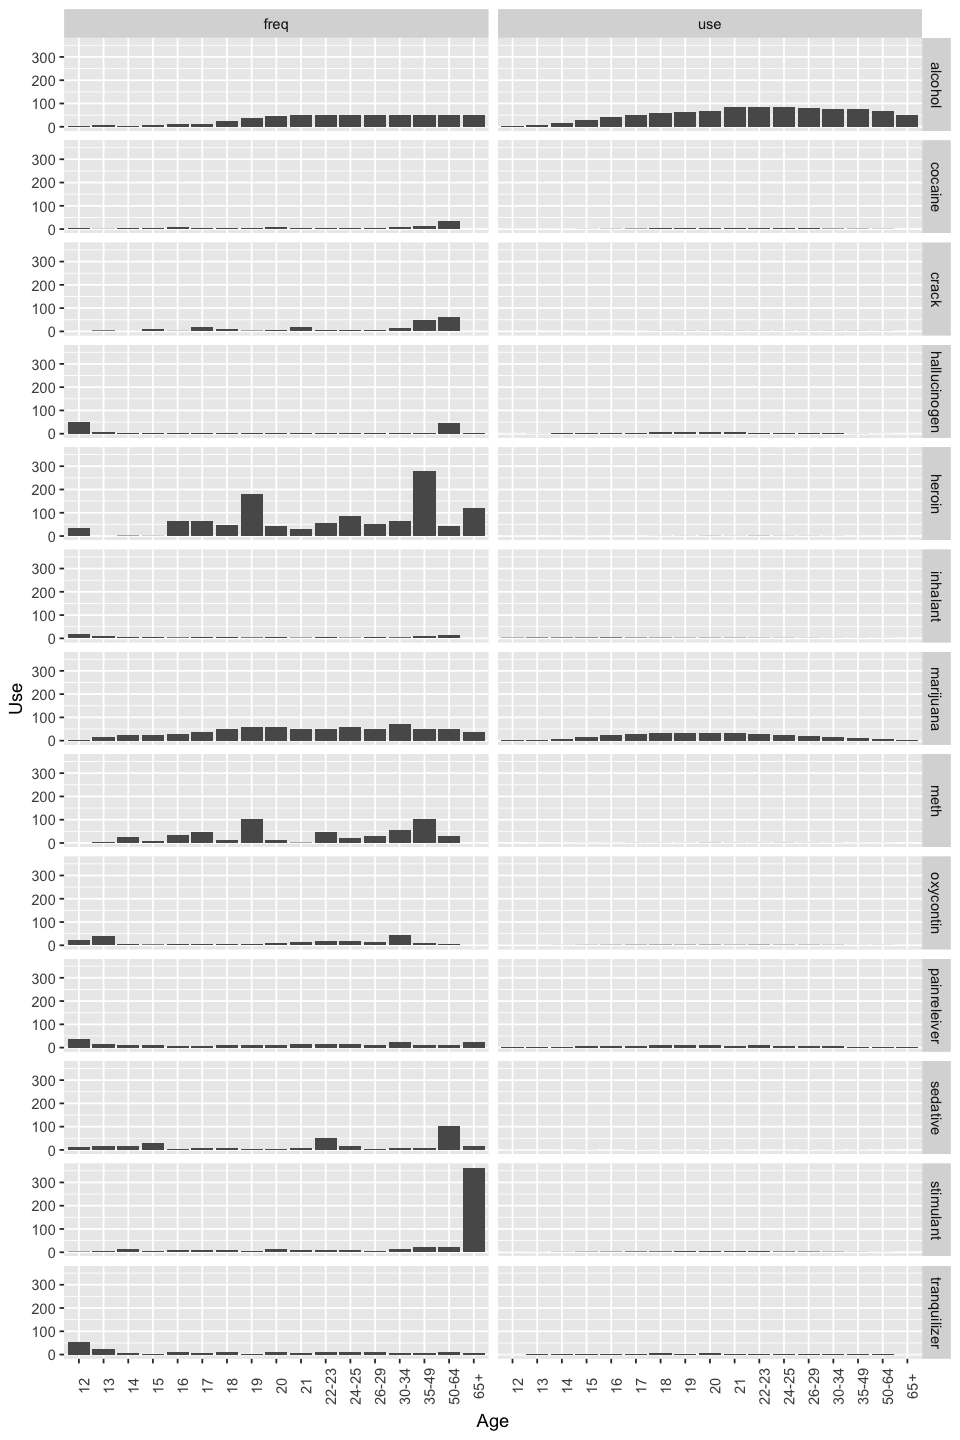

In [14]:
ggplot(data = drug_use_new, mapping = aes(x = age, y = value)) +
    geom_col() +
    labs(x = 'Age', y = 'Use') + 
    theme(axis.text.x = element_text(angle = 90)) +
    facet_grid(drug ~ measure) # note again how I reordered drug based on the total use, this time from the highest to lowest using the - sign in front of use


This is a good 1st step. However, we now want to have `use` and `freq` as separate columns, as they are two different measures, or variables for each of the observations.

So we need to go 1 step back and make it "wider": 

In [15]:
drug_use_new = pivot_wider(drug_use_new,
                           names_from = measure, 
                           values_from = value)

drug_use_new = arrange(drug_use_new,
                       drug)

dim(drug_use_new)
head(drug_use_new, 10)

[1] 221   5

age,n,drug,use,freq
<ord>,<int>,<chr>,<dbl>,<dbl>
12,2798,alcohol,3.9,3
13,2757,alcohol,8.5,6
14,2792,alcohol,18.1,5
15,2956,alcohol,29.2,6
16,3058,alcohol,40.1,10
17,3038,alcohol,49.3,13
18,2469,alcohol,58.7,24
19,2223,alcohol,64.6,36
20,2271,alcohol,69.7,48


Now that the data are tidy, we can make easily plot them:

In [16]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=8, repr.plot.height=5)

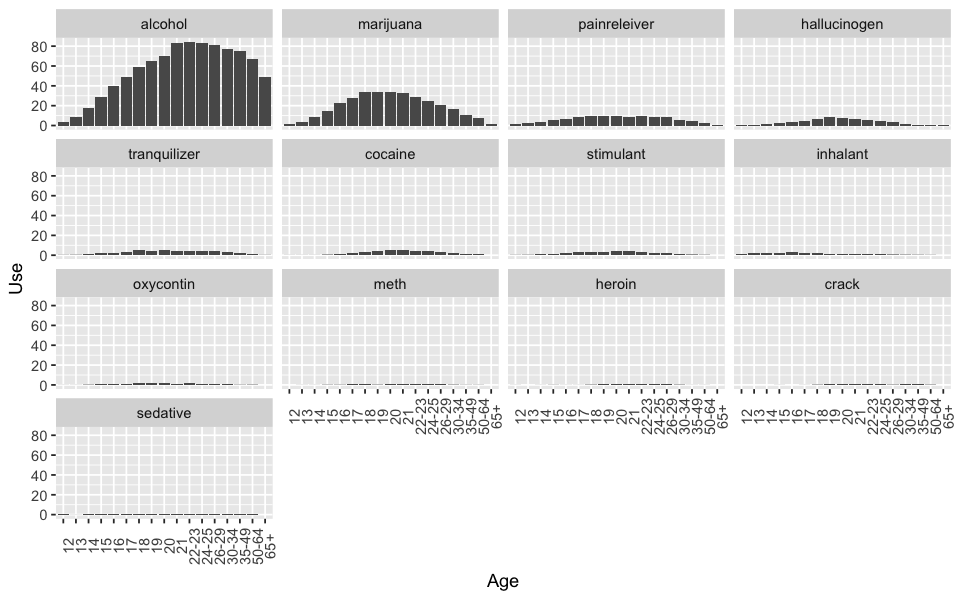

In [17]:
ggplot(data = drug_use_new, mapping = aes(x = age, y = use)) +
    geom_col() +
    labs(x = 'Age', y = 'Use') + 
    theme(axis.text.x = element_text(angle = 90)) +
    facet_wrap( ~ reorder(drug, -use)) # note again how I reordered drug based on the total use, this time from the highest to lowest using the - sign in front of use

## 3. Now it's your turn

**Task A**

Inspect the `police_locals` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/most-police-dont-live-in-the-cities-they-serve/.

1. Create a new dataset, called `police_locals_new`, made of the following columns: `city`, `force_size`, `ethnic_group`, `perc_locals`. You should create the `ethnic_group` column using a pivot function, as shown in this wpa or in wpa_4. The values in this column should be `all`, `white`, `non_white`, `black`, `hispanic`, `asian`. The `perc_locals` column should contain the percentage of officers that live in the town where they work, corresponding to their ethnic group. Rearrange based on the `ethnic_group` and inspect it by printing the first 10 lines.

2. Make a boxplot, with `ethnic_group` on the x-axis and `perc_locals` on the y-axis. `ethnic_group` should be ordered from the lowest `perc_locals` to the highest. Put appropriate labels.

**Task B**

Inspect the `unisex_names` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/there-are-922-unisex-names-in-america-is-yours-one-of-them/.

1. Create a new dataset, called `unisex_names_new`, made of the following columns: `name`, `total`, `gap`, `gender`, `share`. The `gender` column should only contain the values "male" and "female". The `share` column should contain the percentages. 

2. Multiply the `share` column by 100. Re-arrange so that the first rows contain the names with the highest `total`. Print the first 10 rows of the newly created dataset. Create now a new dataset, called `unisex_names_common`, with the names in `unisex_names_new` that have a total higher than 50000.

2. Using `unisex_names_common`, make a barplot that has `share` on the y-axis, `name` on the x-axis, and with each bar split vertically by color based on the `gender`.

**Task C**

Inspect the `tv_states` dataset. Here is the article attached to it: https://fivethirtyeight.com/features/the-media-really-started-paying-attention-to-puerto-rico-when-trump-did/.

1. Create a new dataset, with a different name, that is the long version of `tv_states`. You should decide how to call the new columns, as well as which columns should be used for the transformation.

2. With the newly created dataset, make a plot of your choosing to illustrate the information contained in this dataset. As an inspiration, you can have a look at what plot was done in the article above.

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of Friday.